In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dataset/Mental-Health-Twitter.csv')

In [3]:
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [4]:
tweets = df['post_text']
labels = df['label']

In [5]:
from sentence_transformers import SentenceTransformer
bert_model = SentenceTransformer('distilbert-base-nli-mean-tokens')

In [6]:
embeddings = bert_model.encode(tweets, show_progress_bar=True)
print(embeddings.shape)

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

(20000, 768)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, 
                                          test_size=0.2, random_state=42)
print ("Training set shapes:", X_train.shape, y_train.shape)
print ("Test set shapes:", X_test.shape, y_test.shape)

Training set shapes: (16000, 768) (16000,)
Test set shapes: (4000, 768) (4000,)


In [8]:
from tensorflow.keras import Sequential, layers

classifier = Sequential()
classifier.add (layers.Dense(256, activation='relu', input_shape=(768,)))
classifier.add (layers.Dense(1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  
    
hist = classifier.fit (X_train, y_train, epochs=10, batch_size=16, 
                      validation_data=(X_test, y_test))




Epoch 1/10


1000/1000 [==============================] - 8s 6ms/step - loss: 0.5296 - accuracy: 0.7208 - val_loss: 0.4922 - val_accuracy: 0.7452
Epoch 2/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.4486 - accuracy: 0.7771 - val_loss: 0.4710 - val_accuracy: 0.7623
Epoch 3/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.4046 - accuracy: 0.8063 - val_loss: 0.4488 - val_accuracy: 0.7755
Epoch 4/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.3716 - accuracy: 0.8251 - val_loss: 0.4560 - val_accuracy: 0.7682
Epoch 5/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.3396 - accuracy: 0.8434 - val_loss: 0.4381 - val_accuracy: 0.7768
Epoch 6/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.3038 - accuracy: 0.8647 - val_loss: 0.4442 - val_accuracy: 0.7845
Epoch 7/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.2743 - accuracy: 0.8797 - val_loss: 0.4493 - val_accu

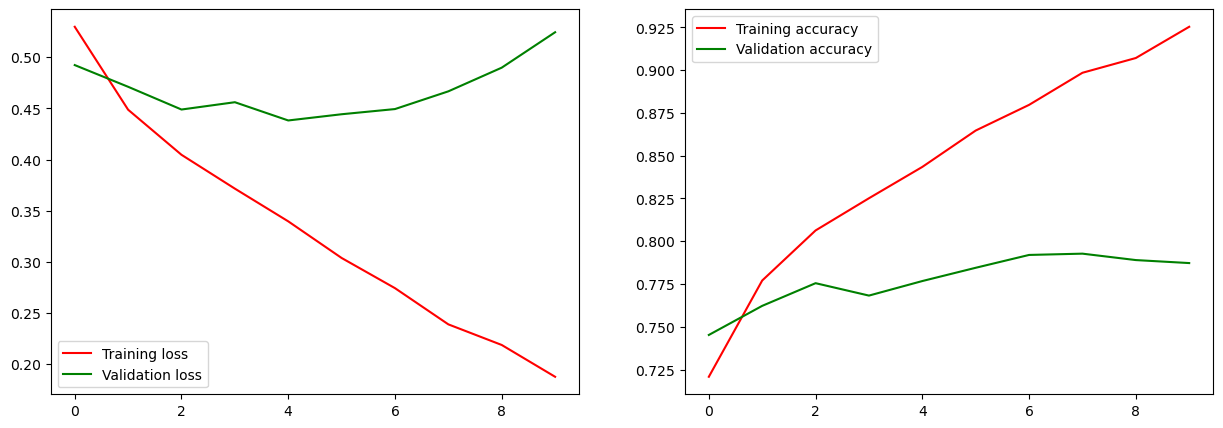

In [10]:
from matplotlib import pyplot

pyplot.figure(figsize=(15,5))
pyplot.subplot(1, 2, 1)
pyplot.plot(hist.history['loss'], 'r', label='Training loss')
pyplot.plot(hist.history['val_loss'], 'g', label='Validation loss')
pyplot.legend()
pyplot.subplot(1, 2, 2)
pyplot.plot(hist.history['accuracy'], 'r', label='Training accuracy')
pyplot.plot(hist.history['val_accuracy'], 'g', label='Validation accuracy')
pyplot.legend()
pyplot.show()

In [68]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def preprocess_sentence(sentence):
    
    embeddings = bert_model.encode([sentence], show_progress_bar=True)
    return embeddings

In [71]:
def predict_sentence(model, sentence):
    threshold=0.5
    # Preprocess the sentence
    preprocessed_sentence = preprocess_sentence(sentence)

    # Make a prediction
    prediction = model.predict(preprocessed_sentence)
    # Classify based on the threshold
    sentiment = "depressed" if prediction >= threshold else "not depressed"
    
    
    
    return sentiment + ' ' + str(prediction)

# Example usage:
# Assuming 'classifier' is your trained model and 'tokenizer' is the tokenizer fitted on your training data
sentence_to_predict = "It's like I'm stuck in a deep, dark hole with no way out."
prediction_result = predict_sentence(classifier, sentence_to_predict)
print(prediction_result)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step
not depressed [[0.08450083]]


In [72]:
prediction_result = predict_sentence(classifier, "Are you free today?")
print(prediction_result)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 48ms/step
depressed [[0.9997366]]


In [73]:
prediction_result = predict_sentence(classifier, "I love you so muchh")
print(prediction_result)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 47ms/step
depressed [[0.63282585]]


In [74]:
prediction_result = predict_sentence(classifier, "I want to sleeep")
print(prediction_result)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 47ms/step
not depressed [[0.3732901]]


In [75]:
prediction_result = predict_sentence(classifier, "Such a busy day ahead. I need to focus but I'm feeling on the edge of derailment right now")
print(prediction_result)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 48ms/step
depressed [[0.63531816]]


In [76]:
prediction_result = predict_sentence(classifier, "I want to dieeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee.. !@#")
print(prediction_result)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 48ms/step
not depressed [[0.34968668]]


In [92]:
prediction_result = predict_sentence(classifier, "Well Well Well")
print(prediction_result)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 40ms/step
depressed [[0.99636275]]


In [88]:
df['post_text'][[19995]]

19995    A day without sunshine is like night.
Name: post_text, dtype: object